<a href="https://colab.research.google.com/github/poniyam/personal/blob/main/1%EC%A3%BC%EC%B0%A8/1_%EA%B2%B0%EC%B8%A1%EC%B9%98%EC%B2%98%EB%A6%AC%EC%99%80_%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98%EC%A0%80%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리
- 결측치 처리
- 분산 0인 컬럼 제거
- Right컬럼 제외
- 상관계수
- VIF계수

In [ ]:
# colab에서 실행시 matplotlib에 한글을 표시하기 위해서 본 셀을 실행후 runtime을 재시작해야 함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
from scipy import stats
import seaborn as sns
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Display_Sensor_Anomaly_Analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
 
## colab용 글씨체 설정
plt.rc('font', family='NanumBarunGothic') 

## local jupyter 용 글씨체 설정
# font_path = "C:\Windows\Fonts\malgun.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# mpl.rc('font', family=font)

import warnings
warnings.filterwarnings(action='ignore')

np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 원본 데이터 불러오기
- 첫번째 열은 날짜이므로 인덱스로 지정하여 데이터를 불러옴
- 초기데이터의 크기는 인덱스 날짜를 빼면 (8145, 840)의 형태

In [ ]:
# working_dir = './data/'
working_dir = '/content/drive/MyDrive/Colab Notebooks/k-digital/[Project]Display_Sensor_Anomaly_Analysis/data/'
fact_init_data = pd.read_csv(working_dir + 'factory_glass_2016.csv', encoding='cp949',index_col='dat...date.name.')

In [ ]:
fact_init_data.shape

(8145, 840)

## 1.결측치처리


### 1) 컬럼의 결측치 확인 
- 결측치를 가진 컬럼들이 134개 존재함.

In [ ]:
# 결측치의 개수를 구한 결과를 내림차순으로 정렬
nan_cols = fact_init_data.isnull().sum().sort_values(ascending=False)
# 결측치 개수가 0보다 큰 컬럼의 수를 출력
print(len(np.where(nan_cols > 0)[0]))

134


- 전체행(8145)이 NaN인 컬럼의 수가 7개 존재

In [ ]:
print('모든 행이 nan인 컬럼의 수 : ',len(np.where(nan_cols == len(fact_init_data))[0]))
print('\n<모든 행이 nan인 컬럼 명>\n',nan_cols[np.where(nan_cols == len(fact_init_data))[0]])

모든 행이 nan인 컬럼의 수 :  7

<모든 행이 nan인 컬럼 명>
 ROOF.HEATING.Zone52.1JIC31152.PV        8145
UPPER.RET..Z218.TMP.1TIC42601.PV        8145
ROOF.HEATING.Zone78.1JIC31178.PV        8145
ROOF.HEATING.Zone76.1JIC31176.PV        8145
LEHR.DRV.MTR..M19.2.CUR.1WII40135.PV    8145
DCS_Offset_RPM_M14.1WOS45114_PV         8145
DCS_Offset_RPM_M13.1WOS45113_PV         8145
dtype: int64


### 2) 컬럼 제거
- 전체행(8145)이 NaN인 7개의 컬럼 제거

In [ ]:
# 모든 행이 nan인 컬럼 drop
fact_init_data = fact_init_data.dropna(how='all', axis=1)
# 컬럼수 확인
print('컬럼 제거 후의 shape확인 :', fact_init_data.shape)

컬럼 제거 후의 shape확인 : (8145, 833)


### 3) 행의 결측치 확인
- 나머지 NaN은 3개의 행에 모두 몰려있음

In [ ]:
fact_init_data[fact_init_data.isnull().any(axis=1)]

,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,LEHR.DRV.MTR..M7.2.SPD.1WSI40111,LEHR.DRV.MTR..M8.1.SPD.1WSI40112,LEHR.DRV.MTR..M8.2.SPD.1WSI40113,LEHR.DRV.MTR..M9.1.SPD.1WSI40114,LEHR.DRV.MTR..M9.2.SPD.1WSI40115,DRIVE.MOTOR.M10.1.SPEED.1WSI40116,LEHR.DRV.MTR..M10.2.SPD.1WSI40117,LEHR.DRV.MTR..M11.1.SPD.1WSI40118,DRIVE.MOTOR.M11.2.SPEED.1WSI40119,LEHR.DRV.MTR..M12.1.SPD.1WSI40120,LEHR.DRV.MTR..M12.2.SPD.1WSI40121,LEHR.DRV.MTR..M13.1.SPD.1WSI40122,LEHR.DRV.MTR..M13.2.SPD.1WSI40123,LEHR.DRV.MTR..M14.1.SPD.1WSI40124,LEHR.DRV.MTR..M14.2.SPD.1WSI40125,LEHR.DRV.MTR..M15.1.SPD.1WSI40126,LEHR.DRV.MTR..M15.2.SPD.1WSI40127,LEHR.DRV.MTR..M16.1.SPD.1WSI40128,DRIVE.MOTOR.M16.2.SPEED.1WSI40129,LEHR.DRV.MTR..M17.1.SPD.1WSI40130,LEHR.DRV.MTR..M17.2.SPD.1WSI40131,LEHR.DRV.MTR..M18.1.SPD.1WSI40132,LEHR.DRV.MTR..M18.2.SPD.1WSI40133,DRIVE.MOTOR.M19.1.SPEED.1WSI40134,LEHR.DRV.MTR..M19.2.SPD.1WSI40135,X1WOS45101_PV,X1WOS45102_PV,X1WOS45103_PV,X1WOS45104_PV,X1WOS45105_PV,...,S_C1_C2_L_L,S_C1_C2_L_R,S_C2_C3_U_L,S_C2_C3_U_R,S_C2_C3_L_L,S_C2_C3_L_R,S_C3_C4_U_L,S_C3_C4_U_R,S_C3_C4_L_L,S_C3_C4_L_R,S_AB1_AB11_L,S_AB1_AB11_R,S_AB11_AB7_L,S_AB11_AB7_R,S_AB7_C4_L,S_AB7_C4_R,S_C4_RET_L,S_C4_RET_R,S_RET_F_L,S_RET_F_R,STD_U_L,STD_U_R,STD_L_L,STD_L_R,STD_GLS_L,STD_GLS_R,투입.LEFT.,투입.RIGHT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
dat...date.name.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 04,1.467846,1.465863,1.466053,1.418393,1.477109,1.419455,1.477109,1.421954,1.396569,1.421954,1.412374,1.421954,1.433805,1.421954,1.433805,1.421954,1.434570,1.421954,1.433707,1.421954,1.438408,1.421954,1.440539,1.421954,1.433707,1.411201,1.469038,1.428242,1.468160,1.418962,1.477109,1.410172,1.466652,1.421954,1.580416,0.684064,0.511284,0.552619,0.552069,0.530375,...,1.166185,1.199438,-0.545404,0.089552,-1.084166,-0.330890,-0.415981,-0.716057,0.131328,-0.410615,-0.627784,-0.591798,1.315342,1.280796,-1.268809,-1.297407,0.293999,0.076699,0.164519,0.818587,-0.383247,-0.620188,0.039335,-0.485325,-1.160946,-1.395816,82,93,2,2,0,0,2.29,4.88,0.00,2.29,0.024,0.024,0.000,0.0
2016-10-13 09,-0.846817,-0.804910,-0.820307,-0.730496,-0.857942,-0.719593,-0.857942,-0.699527,-0.858236,-0.699527,-0.849518,-0.699527,-0.815443,-0.699527,-0.815443,-0.699527,-0.833838,-0.699527,-0.812423,-0.699527,-0.812122,-0.699527,-0.804461,-0.699527,-0.812423,-0.766948,-0.769033,-0.788296,-0.864323,-0.781833,-0.857942,-0.755890,-0.873408,-0.699527,-0.839848,0.464603,0.815738,0.750187,0.552069,0.530375,...,-0.059873,-0.502049,-0.784489,-0.868543,-0.150358,-0.294429,-0.038451,0.070333,-0.078548,0.050499,0.526827,0.547936,-0.496371,-0.425395,-0.013030,-0.011655,0.653207,0.620476,-0.700757,-0.644046,0.360002,0.394778,-0.142186,0.017076,0.422987,0.453458,82,74,6,5,12,0,14.74,13.41,16.22,14.74,0.073,0.061,0.162,0.0
2016-12-27 17,-0.846817,-0.804910,-0.820307,-0.730496,-0.857942,-0.719593,-0.857942,-0.699527,-0.858236,-0.699527,-0.849518,-0.699527,-0.815443,-0.699527,-0.815443,-0.699527,-0.833838,-0.699527,-0.812423,-0.699527,-0.812122,-0.699527,-0.804461,-0.699527,-0.812423,-0.766948,-0.769033,-0.788296,-0.864323,-0.781833,-0.857942,-0.755890,-0.717404,-0.699527,-0.839848,0.025683,-1.315444,-0.830358,0.404232,0.196763,...,NaN,NaN,0.335541,-1.305447,NaN,NaN,-0.496747,-0.467255,NaN,NaN,0.009370,0.204032,0.031374,-0.194762,-1.189177,-0.902694,2.042967,1.706486,0.402644,1.121082,-0.827081,-0.429306,-10.387414,-11.711583,7.669278,7.949552,55,53,0,0,3,0,2.78,0.00,5.66,2.78,0.000,0.000,0.057,0.0


In [ ]:
drop_index = list(fact_init_data[fact_init_data.isnull().any(axis=1)].index)
print('<결측치가 존재하는 행의 인덱스>\n', drop_index)
print('\n<각 행의 NaN개수>')
for i in drop_index:
    print(fact_init_data.loc[i].isnull().sum())

<결측치가 존재하는 행의 인덱스>
 ['2016-06-24 04', '2016-10-13 09', '2016-12-27 17']

<각 행의 NaN개수>
1
39
87


### 4) 행 결측치 대체
- 1시간 간격의 시계열 데이터이므로 결측치를 이전 행의 데이터로 채워넣기

In [ ]:
# NaN 있는 행 - ffill로 값 채우기
fact_data = fact_init_data.fillna(method='ffill')
fact_data[fact_data.isnull().any(axis=1)]

,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,LEHR.DRV.MTR..M7.2.SPD.1WSI40111,LEHR.DRV.MTR..M8.1.SPD.1WSI40112,LEHR.DRV.MTR..M8.2.SPD.1WSI40113,LEHR.DRV.MTR..M9.1.SPD.1WSI40114,LEHR.DRV.MTR..M9.2.SPD.1WSI40115,DRIVE.MOTOR.M10.1.SPEED.1WSI40116,LEHR.DRV.MTR..M10.2.SPD.1WSI40117,LEHR.DRV.MTR..M11.1.SPD.1WSI40118,DRIVE.MOTOR.M11.2.SPEED.1WSI40119,LEHR.DRV.MTR..M12.1.SPD.1WSI40120,LEHR.DRV.MTR..M12.2.SPD.1WSI40121,LEHR.DRV.MTR..M13.1.SPD.1WSI40122,LEHR.DRV.MTR..M13.2.SPD.1WSI40123,LEHR.DRV.MTR..M14.1.SPD.1WSI40124,LEHR.DRV.MTR..M14.2.SPD.1WSI40125,LEHR.DRV.MTR..M15.1.SPD.1WSI40126,LEHR.DRV.MTR..M15.2.SPD.1WSI40127,LEHR.DRV.MTR..M16.1.SPD.1WSI40128,DRIVE.MOTOR.M16.2.SPEED.1WSI40129,LEHR.DRV.MTR..M17.1.SPD.1WSI40130,LEHR.DRV.MTR..M17.2.SPD.1WSI40131,LEHR.DRV.MTR..M18.1.SPD.1WSI40132,LEHR.DRV.MTR..M18.2.SPD.1WSI40133,DRIVE.MOTOR.M19.1.SPEED.1WSI40134,LEHR.DRV.MTR..M19.2.SPD.1WSI40135,X1WOS45101_PV,X1WOS45102_PV,X1WOS45103_PV,X1WOS45104_PV,X1WOS45105_PV,...,S_C1_C2_L_L,S_C1_C2_L_R,S_C2_C3_U_L,S_C2_C3_U_R,S_C2_C3_L_L,S_C2_C3_L_R,S_C3_C4_U_L,S_C3_C4_U_R,S_C3_C4_L_L,S_C3_C4_L_R,S_AB1_AB11_L,S_AB1_AB11_R,S_AB11_AB7_L,S_AB11_AB7_R,S_AB7_C4_L,S_AB7_C4_R,S_C4_RET_L,S_C4_RET_R,S_RET_F_L,S_RET_F_R,STD_U_L,STD_U_R,STD_L_L,STD_L_R,STD_GLS_L,STD_GLS_R,투입.LEFT.,투입.RIGHT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
dat...date.name.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 2.분산 0인 컬럼 제거


### 1) 분산 확인
- 분산 : 각 데이터의 편차 제곱 합
- 분산을 출력해봤지만 분산값의 어떤 기준으로 컬럼을 제거해도 되는지 모르겠어서 일단 다른 방법을 찾아봤음


In [ ]:
var_list = np.var(fact_data)
var_list

LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101     1.000120
LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102     1.000179
LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103     1.000158
LEHR.DRV.MTR..M4.1.SPD.1WSI40104      1.000278
LEHR.DRV.MTR..M4.2.SPD.1WSI40105      1.000104
                                       ...    
ROLLDOWN.진공패드.폐기율..전체.               22.484980
L.RD                                  0.002029
L.Vac                                 0.001013
R.RD                                  0.002271
R.Vac                                 0.000251
Length: 833, dtype: float64

### 2) sklearn의 VarianceThreshold를 이용한 컬럼 제거
- VarianceThreshold를 이용하여 분산이 0에 수렴하는 컬럼을 제거했음
- [VarianceThreshold에 대한 문서 참조1](https://runebook.dev/en/docs/scikit_learn/modules/generated/sklearn.feature_selection.variancethreshold)
- [VarianceThreshold에 대한 문서 참조2](https://datascienceschool.net/03%20machine%20learning/14.03%20%ED%8A%B9%EC%A7%95%20%EC%84%A0%ED%83%9D.html#id2)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# 분산이 0에 수렴하는 컬럼을 제거하고 DataFrame을 반환하는 함수
def VarianceThreshold_selector(data):
    # 임계값으로 0을 지정
    selector = VarianceThreshold(0)
    selector.fit(data)
    # 남겨지는 컬럼index 저장
    features = selector.get_support(indices = True)
    # 남겨지는 컬럼명 저장
    features = [data.iloc[:,column].name for column in features]
    # 제거 컬럼명 출력
    deleted_columns = [column for column in data.columns if column not in features]
    print('제거된 컬럼명의 개수 : ', len(deleted_columns))
    print('\n 제거된 컬럼명 : ')
    for i in deleted_columns:
        print(i)
    selector = pd.DataFrame(selector.transform(data))
    selector.index = data.index
    selector.columns = features
    # DataFrame 반환
    return selector

print('컬럼제거 전 : ',  fact_data.shape)
fact_data = VarianceThreshold_selector(fact_data)
print('컬럼제거 후 : ',  fact_data.shape)

컬럼제거 전 :  (8145, 833)
제거된 컬럼명의 개수 :  7

 제거된 컬럼명 : 
LEHR.DRV.MTR..M4.2.CUR.1WII40105.PV
LEHR.DRV.MTR..M9.1.CUR.1WII40114.PV
LEHR.DRV.MTR..M9.2.CUR.1WII40115.PV
LEHR.DRV.MTR..M10.1.CUR.1WII40116.PV
LEHR.DRV.MTR..M14.1.CUR.1WII40124.PV
LEHR.DRV.MTR..M17.2.CUR.1WII40131.PV
TMP.TIN..BAY.4.LEFT.1TI30203.PV
컬럼제거 후 :  (8145, 826)


## 3.레이블 관련 컬럼 제거
- 아래 컬럼들은 레이블와 큰 관련이 있는데 피처의 상관관계나 VIF계수를 확인하는데 영향을 주므로 제거함
```
    투입.LEFT.
    투입.RIGHT.
    ROLLDOWN.폐기.LEFT.
    진공패드.폐기.LEFT.
    ROLLDOWN.폐기.RIGHT.
    진공패드.폐기.RIGHT.
    폐기율...
    ROLLDOWN.진공패드.폐기율..LEFT.
    ROLLDOWN.진공패드.폐기율..RIGHT.
```

## 4.피처와 레이블을 따로 저장

### 1) 레이블 저장

In [ ]:
y_data = fact_data.iloc[:, -4:]
y_data

,L.RD,L.Vac,R.RD,R.Vac
dat...date.name.,,,,
2016-01-01 07,0.025,0.063,0.108,0.041
2016-01-01 08,0.000,0.022,0.133,0.000
2016-01-01 09,0.016,0.063,0.000,0.000
2016-01-01 10,0.000,0.103,0.000,0.000
2016-01-01 11,0.000,0.000,0.000,0.000
...,...,...,...,...
2016-12-31 19,0.000,0.031,0.144,0.000
2016-12-31 20,0.010,0.021,0.121,0.009
2016-12-31 21,0.017,0.009,0.100,0.027


### 2) 피처 저장

In [ ]:
fact_data = fact_data.iloc[:, :-14]

## 5.Right컬럼 제외
- Right컬럼과 Left컬럼은 상관관계가 매우 유사하게 나타나므로 서로 영향을 크게 줄 것으로 예상됨
- 그래서 Left컬럼만을 가지고 분석을 하기 위해 Right컬럼을 제외시킴


### 1) Right컬럼 불러오기

In [ ]:
# right컬럼명이 저장된 텍스트 파일 불러오기
right_col_file = open(working_dir + 'right_columns.txt')
file_contents = right_col_file.read()
right_col_list = file_contents.splitlines()
print(len(right_col_list))

91


### 2) Right컬럼 제거

In [ ]:
lc_columns = [col for col in fact_data.columns if col not in right_col_list]
print('제거할 Right 컬럼의 수', len(fact_data.columns) - len(lc_columns))
print('남겨지는 컬럼의 수', len(lc_columns))
# Left, center 컬럼 데이터 프레임 저장
fact_lc_data = fact_data[lc_columns]

제거할 Right 컬럼의 수 87
남겨지는 컬럼의 수 725


## 6.상관계수가 0.9이상인 컬럼 제거

### 1) 상관계수 데이터프레임 확인

In [ ]:
bf_corr_df = fact_lc_data.corr().abs()
bf_corr_df

,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,LEHR.DRV.MTR..M7.2.SPD.1WSI40111,LEHR.DRV.MTR..M8.1.SPD.1WSI40112,LEHR.DRV.MTR..M8.2.SPD.1WSI40113,LEHR.DRV.MTR..M9.1.SPD.1WSI40114,LEHR.DRV.MTR..M9.2.SPD.1WSI40115,DRIVE.MOTOR.M10.1.SPEED.1WSI40116,LEHR.DRV.MTR..M10.2.SPD.1WSI40117,LEHR.DRV.MTR..M11.1.SPD.1WSI40118,DRIVE.MOTOR.M11.2.SPEED.1WSI40119,LEHR.DRV.MTR..M12.1.SPD.1WSI40120,LEHR.DRV.MTR..M12.2.SPD.1WSI40121,LEHR.DRV.MTR..M13.1.SPD.1WSI40122,LEHR.DRV.MTR..M13.2.SPD.1WSI40123,LEHR.DRV.MTR..M14.1.SPD.1WSI40124,LEHR.DRV.MTR..M14.2.SPD.1WSI40125,LEHR.DRV.MTR..M15.1.SPD.1WSI40126,LEHR.DRV.MTR..M15.2.SPD.1WSI40127,LEHR.DRV.MTR..M16.1.SPD.1WSI40128,DRIVE.MOTOR.M16.2.SPEED.1WSI40129,LEHR.DRV.MTR..M17.1.SPD.1WSI40130,LEHR.DRV.MTR..M17.2.SPD.1WSI40131,LEHR.DRV.MTR..M18.1.SPD.1WSI40132,LEHR.DRV.MTR..M18.2.SPD.1WSI40133,DRIVE.MOTOR.M19.1.SPEED.1WSI40134,LEHR.DRV.MTR..M19.2.SPD.1WSI40135,X1WOS45101_PV,X1WOS45102_PV,X1WOS45103_PV,X1WOS45104_PV,X1WOS45105_PV,...,D_GLS_AB7_LR,D_GLS_C4_LR,D_GLS_F_LR,D_GLS_RET_LR,S_AB1_AB2_U_L,S_AB1_AB2_L_L,S_AB2_AB3_U_L,S_AB2_AB3_L_L,S_AB3_AB4_U_L,S_AB3_AB4_L_L,S_AB4_AB5_U_L,S_AB4_AB5_L_L,S_AB5_AB6_U_L,S_AB5_AB6_L_L,S_AB6_AB7_U_L,S_AB6_AB7_L_L,S_AB7_AB8_U_L,S_AB7_AB8_L_L,S_AB8_AB9_U_L,S_AB8_AB9_L_L,S_AB9_AB10_U_L,S_AB9_AB10_L_L,S_AB10_AB11_U_L,S_AB10_AB11_L_L,S_AB11_C1_U_L,S_AB11_C1_L_L,S_C1_C2_U_L,S_C1_C2_L_L,S_C2_C3_U_L,S_C2_C3_L_L,S_C3_C4_U_L,S_C3_C4_L_L,S_AB1_AB11_L,S_AB11_AB7_L,S_AB7_C4_L,S_C4_RET_L,S_RET_F_L,STD_U_L,STD_L_L,STD_GLS_L
LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,1.000000,0.998529,0.998961,0.946999,0.999621,0.947509,0.999621,0.948637,0.998814,0.948637,0.993560,0.948637,0.997809,0.948637,0.997809,0.948637,0.998379,0.948637,0.997734,0.948637,0.997786,0.948637,0.997509,0.948637,0.997734,0.950771,0.997784,0.964125,0.999100,0.962541,0.999621,0.947712,0.998737,0.948637,0.998030,0.152582,0.122086,0.109522,0.006943,0.071868,...,0.102666,0.171344,0.262834,0.186952,0.312269,0.035823,0.185379,0.280394,0.067528,0.067077,0.078343,0.135737,0.040929,0.015368,0.051143,0.246656,0.259375,0.092934,0.007568,0.199916,0.165685,0.267851,0.412719,0.163448,0.743963,0.620052,0.613652,0.144451,0.182629,0.055444,0.160398,0.172177,0.193694,0.286176,0.263237,0.195855,0.798225,0.494597,0.161406,0.330618
LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,0.998529,1.000000,0.999324,0.945754,0.998406,0.947127,0.998406,0.948352,0.997613,0.948352,0.992219,0.948352,0.999255,0.948352,0.999255,0.948352,0.998550,0.948352,0.999390,0.948352,0.999432,0.948352,0.998964,0.948352,0.999390,0.948426,0.998317,0.962006,0.998065,0.960315,0.998406,0.945162,0.997926,0.948352,0.998230,0.132576,0.107047,0.093478,0.007097,0.057220,...,0.112804,0.154296,0.286987,0.188342,0.313957,0.037255,0.186273,0.280471,0.063250,0.058250,0.076103,0.131849,0.039781,0.014519,0.054836,0.243830,0.270094,0.096639,0.009674,0.212340,0.165603,0.285663,0.423763,0.174983,0.771046,0.631354,0.626570,0.146257,0.199281,0.067348,0.172284,0.184106,0.183307,0.274236,0.266795,0.166817,0.806619,0.520999,0.171386,0.317573
LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,0.998961,0.999324,1.000000,0.946835,0.998744,0.947548,0.998744,0.948337,0.997866,0.948337,0.992526,0.948337,0.998783,0.948337,0.998783,0.948337,0.999062,0.948337,0.998660,0.948337,0.998707,0.948337,0.998310,0.948337,0.998660,0.949189,0.998007,0.962684,0.998336,0.961032,0.998744,0.946002,0.998113,0.948337,0.998672,0.140048,0.112849,0.099589,0.001683,0.062857,...,0.108435,0.153822,0.277038,0.185757,0.312160,0.035947,0.181203,0.276049,0.064764,0.061740,0.076404,0.132780,0.041394,0.015662,0.054249,0.243375,0.264133,0.093689,0.009123,0.207049,0.165305,0.279012,0.422872,0.176323,0.763108,0.628789,0.622722,0.148041,0.194146,0.063870,0.164898,0.179206,0.188049,0.281426,0.269475

### 2) 상관계수 heatmap확인

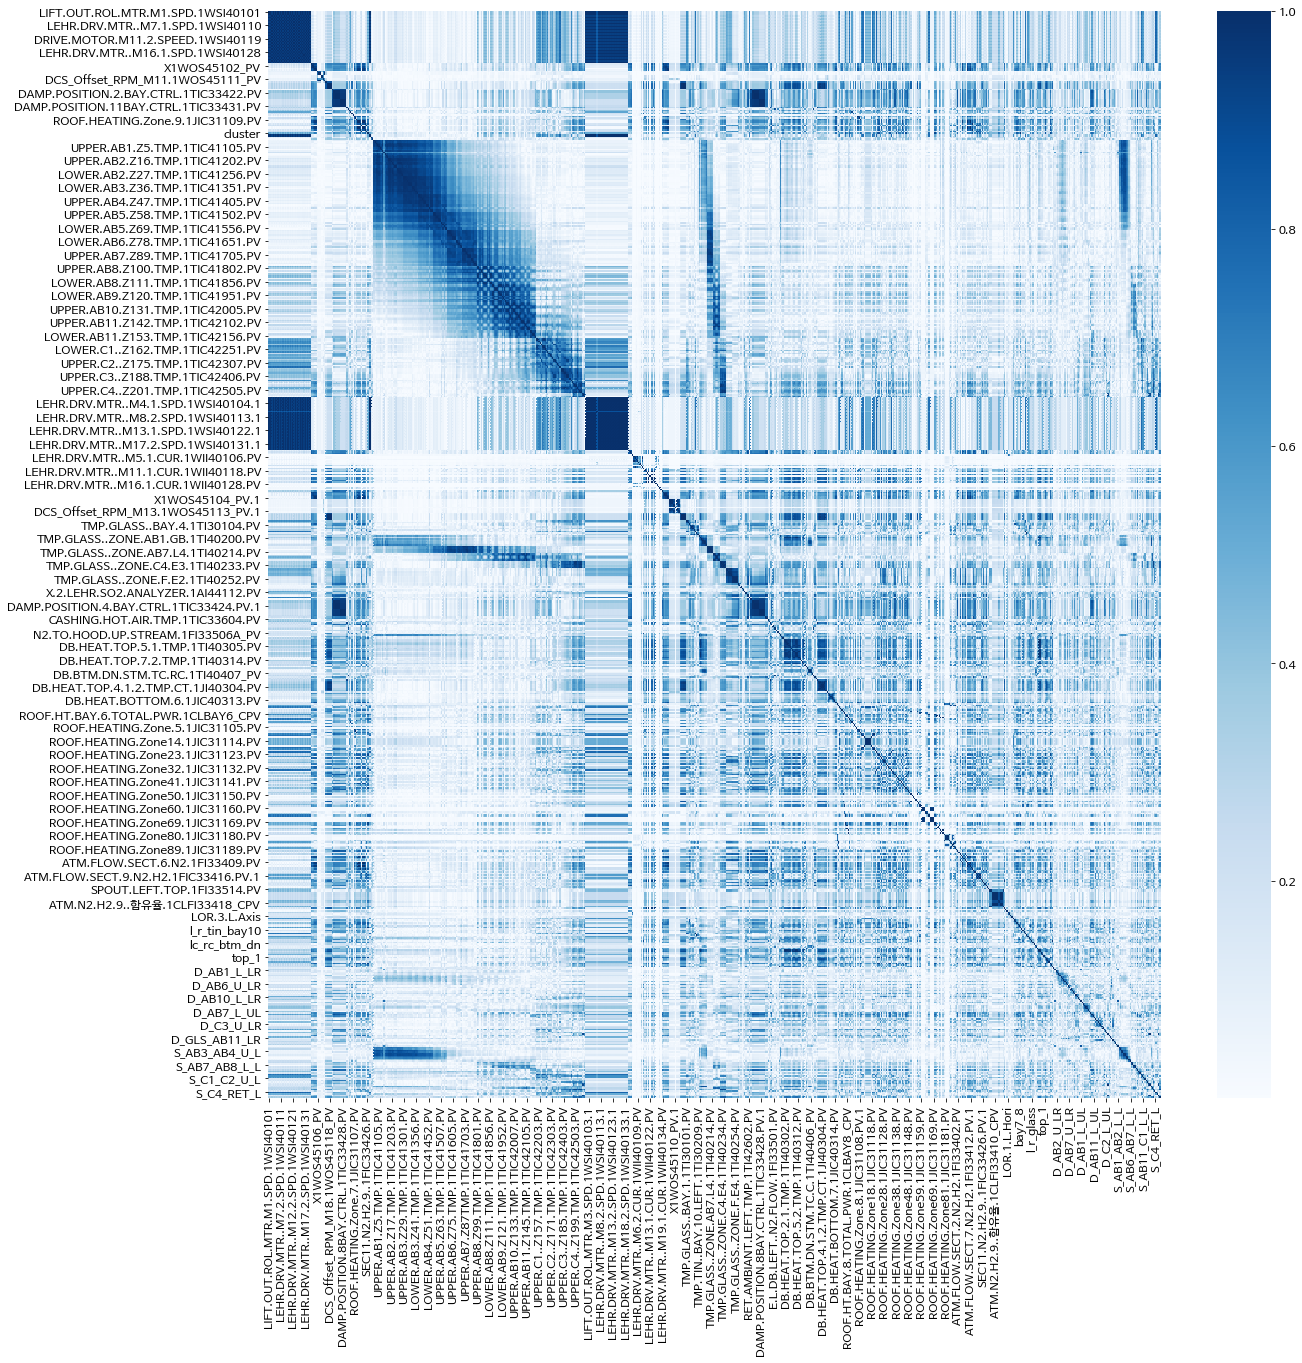

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(bf_corr_df, cmap='Blues')

### 3) 제거될 컬럼의 수 확인하고 컬럼 제거


In [ ]:
from tqdm import tqdm
del_list = []

for i, col in enumerate(tqdm(bf_corr_df.columns)):
    for j in range(len(bf_corr_df.index)):
        if i == j:
            continue 
        elif bf_corr_df.index[i] in del_list:
            break 

        if np.abs(bf_corr_df.iloc[j,i]) >= 0.9:
            del_list.append(bf_corr_df.index[j])


100%|██████████| 725/725 [00:09<00:00, 74.06it/s]


In [ ]:
print('제거할 컬럼의 수 :', len([col for col in bf_corr_df.columns if col in del_list]))
fact_data_result = fact_lc_data.drop(columns = del_list, axis=1)
fact_data_result.shape

제거할 컬럼의 수 : 401


(8145, 324)

### 4) 컬럼 제거 후 heatmap확인

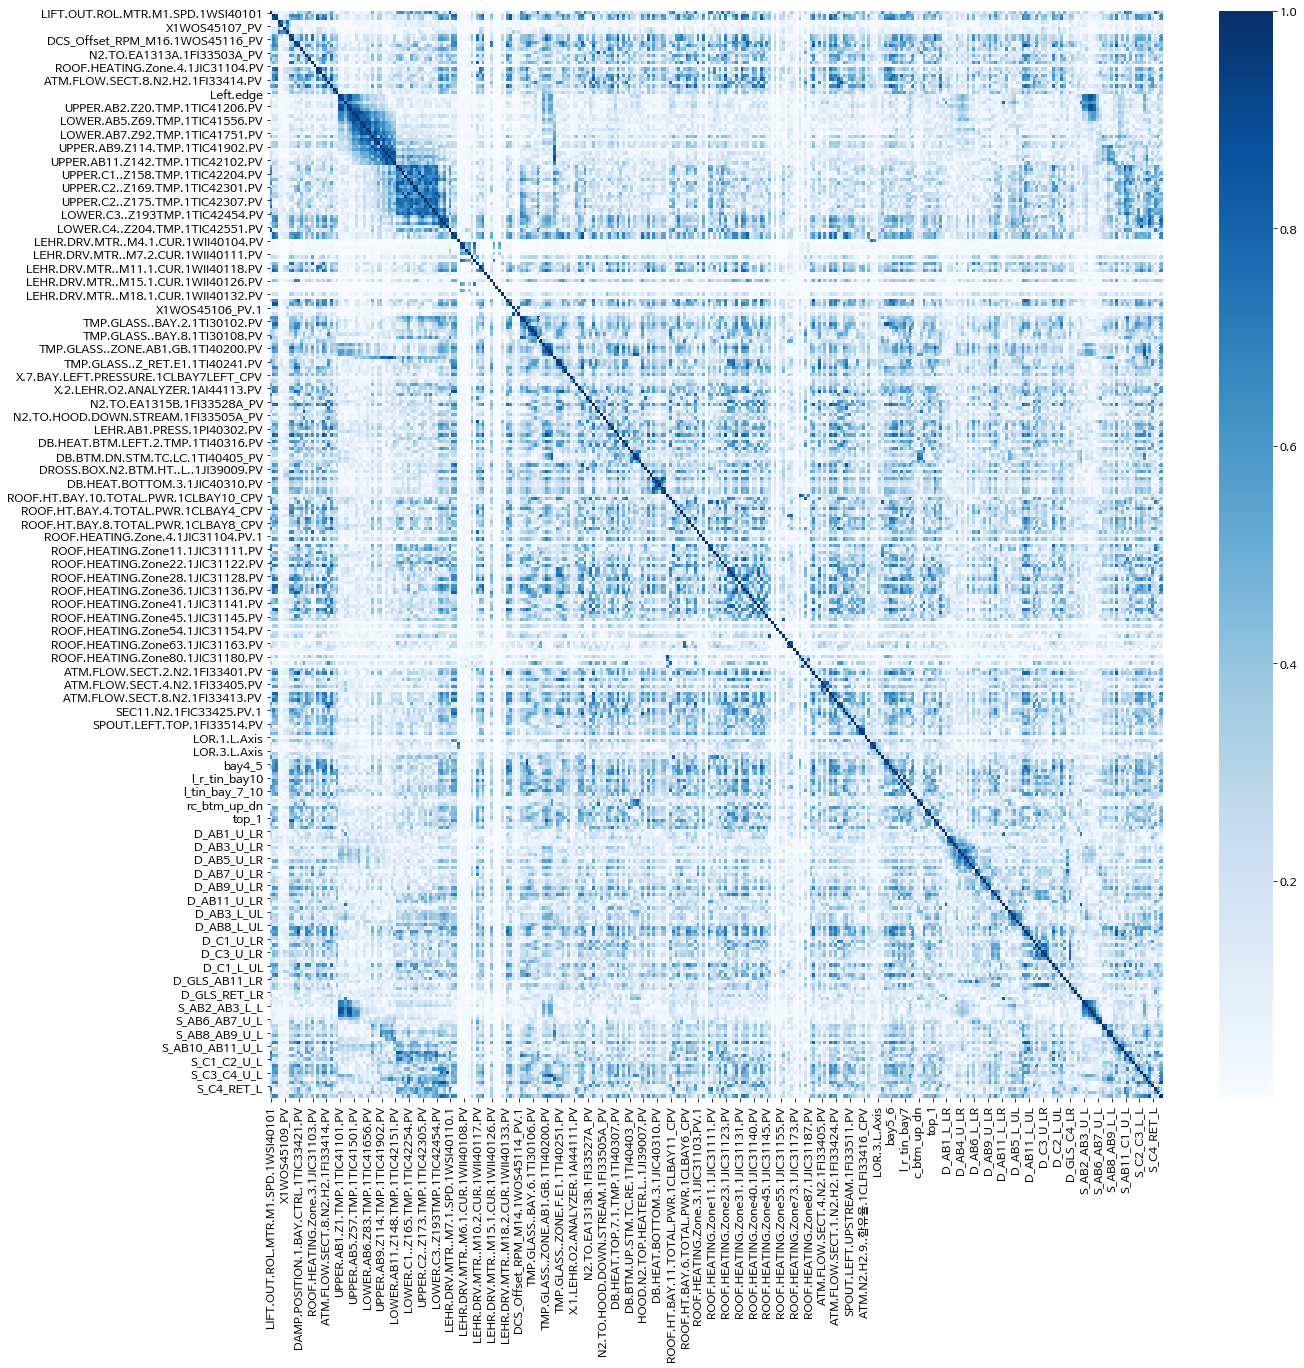

In [ ]:
af_corr_df = fact_data_result.corr().abs()
af_corr_df
plt.figure(figsize=(20,20))
sns.heatmap(af_corr_df, cmap='Blues')

## 7.VIF계수가 30이상인 컬럼 제거

### 1) VIF로 컬럼 제거하기 전에 데이터 저장

In [ ]:
fact_data_result.to_csv(working_dir + 'fact_lr_noVIF_feature.csv')

### 2) 가장 큰 VIF계수 구하는 함수
- vif계수가 높다는 것은 피처간의 원인관계가 높다는 것을 의미하므로 모델 훈련을 할 때 큰 영향을 주므로 제거해야 합니다. 이를 위해서 가장 큰 vif계수와 컬럼을 구하는 함수를 구현했습니다.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df, columns_all):
    
    vif_df = pd.DataFrame()
    # 매개변수로 받은 피처의 vif계수 구하기
    vif_df["VIF Factor"] = [variance_inflation_factor(df[columns_all].values, i) for i in range(df[columns_all].values.shape[1])]
    # 피처 저장
    vif_df["features"] = columns_all
    # vif계수를 내림차순으로 정렬
    vif_df.sort_values(by="VIF Factor",ascending=False, inplace=True)

    # vif계수가 가장 큰 컬럼명
    max_col_name = vif_df.iloc[0].features
    # vif계수 저장
    max_vif = max(vif_df['VIF Factor'])
    # vif계수 데이터프레임, vif계수가 가장 큰 컬럼과 vif계수 반환
    return vif_df, max_col_name, max_vif

### 3)  가장 큰 vif계수가 30보다 작을 때까지 컬럼을 제거
- 나무플래닛멘토의 조언으로 기준을 30으로 잡음

In [ ]:
column_list = list(fact_data_result.columns)

# vif계수와 컬럼 데이터프레임
new_vif_df = pd.DataFrame()
# vif계수가 가장 큰 컬럼명
new_max_col_name = ''
# vif계수
new_max_vif = 100
# 제거된 컬럼의 수
count = 0

# vif계수가 30보다 작아질 때까지 반복
while new_max_vif > 30:
    # 제거된 컬럼의 수 1 증가
    count += 1
    # vif계수가 가장 큰 컬럼 정보 반환
    new_vif_df, new_max_col_name, new_max_vif = get_vif(fact_data_result, column_list)
    # 피처 리스트로부터 vif계수가 가장 큰 컬럼 제거
    column_list.remove(new_max_col_name)
    print(f'[{count}] 제거된 컬럼명 : ', new_max_col_name)
    print(f'[{count}] VIF계수 : ', new_max_vif)
    print('\n')

# vif계수가 30보다 작아질 때의 vif계수    
new_vif_df

[1] 삭제된 컬럼명 :  D_AB1_L_UL
[1] VIF계수 :  600479950316066.1


[2] 삭제된 컬럼명 :  DB.BTM.UP.STM.TC.RC.1TI40402_PV
[2] VIF계수 :  750599937895082.6


[3] 삭제된 컬럼명 :  TMP.GLASS..BAY.8.1TI30108.PV
[3] VIF계수 :  500399958596721.75


[4] 삭제된 컬럼명 :  le_re_btm_dn
[4] VIF계수 :  600479950316066.1


[5] 삭제된 컬럼명 :  S_AB10_AB11_U_L
[5] VIF계수 :  818836295885544.8


[6] 삭제된 컬럼명 :  S_AB8_AB9_U_L
[6] VIF계수 :  643371375338642.2


[7] 삭제된 컬럼명 :  DB.BTM.DN.STM.TC.RE.1TI40408_PV
[7] VIF계수 :  1000799917193443.5


[8] 삭제된 컬럼명 :  S_AB2_AB3_L_L
[8] VIF계수 :  2251799813685248.0


[9] 삭제된 컬럼명 :  S_AB7_AB8_L_L
[9] VIF계수 :  1000799917193443.5


[10] 삭제된 컬럼명 :  bay2_4
[10] VIF계수 :  3002399751580330.5


[11] 삭제된 컬럼명 :  TMP.GLASS..BAY.6.1TI30106.PV
[11] VIF계수 :  1801439850948198.5


[12] 삭제된 컬럼명 :  TMP.TIN..BAY.5.LEFT.1TI30205.PV
[12] VIF계수 :  9007199254740992.0


[13] 삭제된 컬럼명 :  bay4_5
[13] VIF계수 :  4503599627370496.0


[14] 삭제된 컬럼명 :  S_AB9_AB10_L_L
[14] VIF계수 :  9007199254740992.0


[15] 삭제된 컬럼명 :  D_AB11_L_UL
[15] VIF계수 :  90

,VIF Factor,features
116,29.823861,l_r_tin_bay7
16,29.049446,UPPER.C1..Z157.TMP.1TIC42203.PV
75,28.187204,ROOF.HEATING.Zone12.1JIC31112.PV
115,28.179428,bay6_7
114,28.002278,bay1_2
...,...,...
31,1.019771,LEHR.DRV.MTR..M16.2.CUR.1WII40129.PV
28,1.016093,LEHR.DRV.MTR..M13.1.CUR.1WII40122.PV
84,1.011653,ROOF.HEATING.Zone54.1JIC31154.PV
34,1.010750,LEHR.DRV.MTR..M18.2.CUR.1WII40133.PV


### 4) 피처와 레이블 csv저장
- 공정 데이터에 최종적으로 남은 피처리스트를 적용하여 피처를 저장하였음
- 피처의 크기 : 8145 rows × 166 columns
- 레이블의 크기 : 8145 rows × 4 columns

In [ ]:
new_fact_data_vif = fact_data_result[column_list]
# 피처를 csv파일로 저장
new_fact_data_vif.to_csv(working_dir + 'fact_lr_VIF_feature.csv')
# 레이블을 csv파일로 저장
y_data.to_csv(working_dir + 'fact_lr_labels.csv')